# Exploratory Data Analysis

<b> Importing Libraries and Datasets

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set()
import datetime as dt

In [127]:
df = pd.read_csv('nyc_taxi_trip_duration.csv')

In [128]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [129]:
df.shape

(729322, 11)

In [130]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [131]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

* Id, Pickup_datetime, dropoff_datetime and store_and_fwd_flag are of datatypes 'object'
* Vendor_id, passenger_count, trip_duration are of datatypes 'int'
* pickup_longitude, pickup_latitude, dropoff_longitude and dropoff_latitude are of datatypes 'float'

In [132]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

* There are no null values in any of the features in this dataset

In [133]:
df.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

* No of unique values in each of the features in this dataset

In [134]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


* Vendor Id has a minimum value of 1 and maximum value of 2. So there are 2 distinct vendor ids.
* There can be 9 passengers at the maximum during the trip. Minimum values of passenger count is 0.

<b> Timeseries Data

In [135]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [136]:
df['trip_day'] = df['pickup_datetime'].dt.weekday
df['trip_day_name'] = df['pickup_datetime'].dt.day_name()
df['trip_month'] = df['pickup_datetime'].dt.month
df['trip_hour'] = df['pickup_datetime'].dt.hour

In [137]:
def time_of_day(x):
    if x in range(0,6):
        return 'Early Morning'
    elif x in range(6, 12):
        return 'Morning'
    elif x in range(12, 16):
        return 'Afternoon'
    elif x in range(16,20):
        return 'Evening'
    else:
        return 'Late night'

In [138]:
df['trip_timeofday'] = df['trip_hour'].apply(time_of_day)

In [139]:
from geopy.distance import great_circle

In [140]:
def cal_distance(pickup_lat,pickup_long, dropoff_lat, dropoff_long):
    start_coord = (pickup_lat,pickup_long)
    stop_coord =  (dropoff_lat,dropoff_long)
    return great_circle(start_coord,stop_coord).miles

In [141]:
df['distance'] = df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [142]:

def dist_range(x):
    if 0.0 <= x < 0.5:
        return '0 - 0.5'
    elif  0.5 <= x < 1:
        return '0.5 - 1'
    elif 1 <= x < 1.5:
        return '1 - 1.5'
    elif 1.5 <= x < 2.0:
        return '1.5 - 2'
    elif 2.0 <= x < 2.5:
        return '2 - 2.5'
    elif 2.5 <= x < 3.0:
        return '2.5 - 3'
    else:
        return '> 3'

In [143]:
df['dist_range'] = df['distance'].apply(dist_range)

In [144]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_day,trip_day_name,trip_month,trip_hour,trip_timeofday,distance,dist_range
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0,Monday,2,16,Evening,0.745070,0.5 - 1
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,4,Friday,3,23,Late night,2.565714,2.5 - 3
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,6,Sunday,2,17,Evening,4.505415,> 3
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,1,Tuesday,1,9,Morning,1.467120,1 - 1.5
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2,Wednesday,2,6,Morning,2.689630,2.5 - 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296,5,Saturday,5,13,Afternoon,0.696075,0.5 - 1
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315,0,Monday,2,0,Early Morning,0.452797,0 - 0.5
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673,4,Friday,4,18,Evening,1.428395,1 - 1.5
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447,6,Sunday,6,9,Morning,0.525877,0.5 - 1


<b> Exploratory Data Analysis

<b> Univariate Analysis

<Axes: xlabel='vendor_id', ylabel='count'>

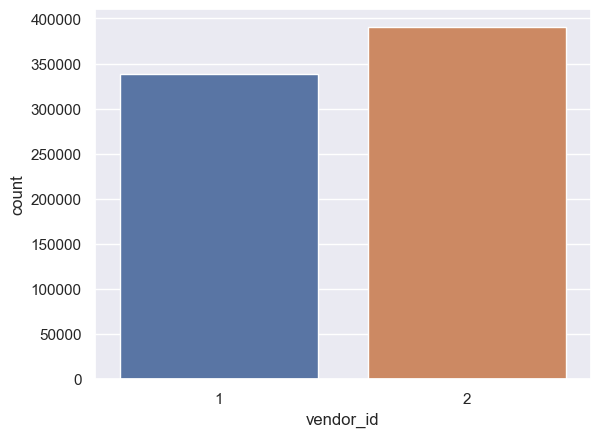

In [145]:
sns.countplot(x="vendor_id", data=df)

There are 2 different types of vendors in this dataset. There is not much of a difference between two vendors.

In [146]:
df['distance'].value_counts()

0.000000    2901
0.000264      21
0.000264      19
0.000264      16
0.000791      11
            ... 
1.820096       1
0.607483       1
0.574907       1
2.555086       1
3.694577       1
Name: distance, Length: 726241, dtype: int64

1. There are about 2901 trips wherein the distance is recorded as 0 miles. Did the driver missed to record the drop off and pick
up location on these trips or did the passenger cancel these trips?


<Axes: xlabel='distance', ylabel='Count'>

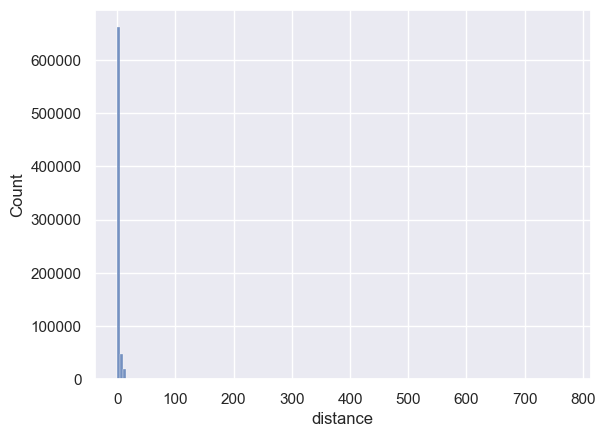

In [147]:
sns.histplot(df['distance'], binwidth=5)

<Axes: xlabel='dist_range', ylabel='count'>

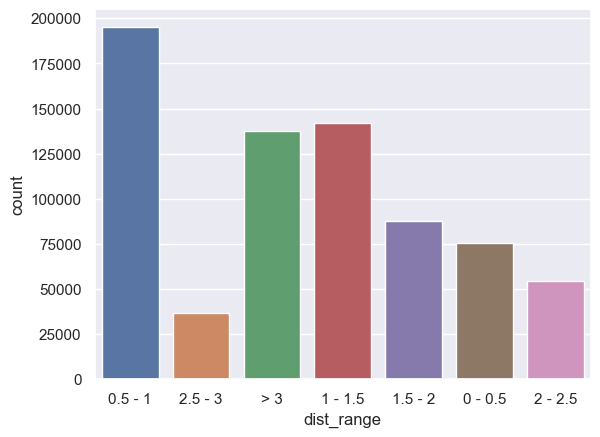

In [148]:
sns.countplot(x="dist_range", data=df)

* There is not much to interpret from histogram of distance
* When plotted based on the distance range, most of the rides in the range 0.5 -1, followed by 1 - 1.5 and then > 3

<Axes: xlabel='trip_timeofday', ylabel='count'>

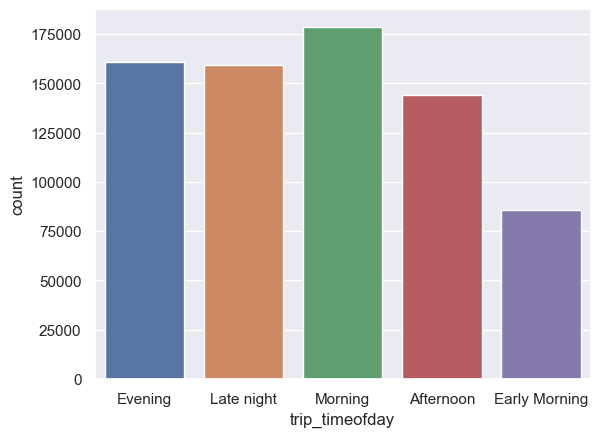

In [149]:
sns.countplot(x="trip_timeofday", data=df)

* Majority of the rides are in the morning
* Number of rides between evening and latenight is not much different 

In [150]:
df.passenger_count.value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

There are very few trips wherein the passenger count is record as 0. There are only 33 such records

<Axes: xlabel='passenger_count', ylabel='count'>

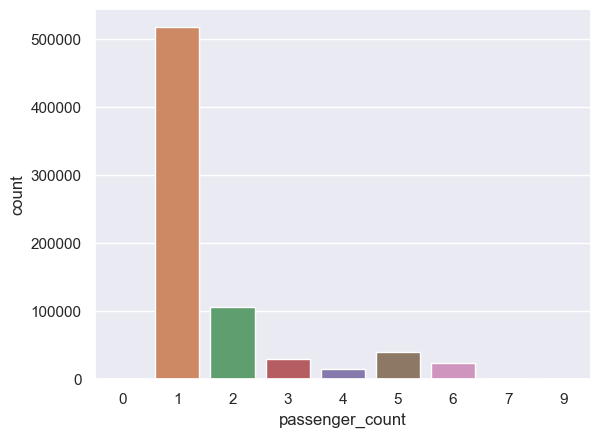

In [151]:
sns.countplot(x="passenger_count", data=df)

* Majority of the trips are with single passenger
* There are very few trips wherein there were more than one passenger
* No of trips with passenger count 7 and 9 is only one

In [152]:
df['store_and_fwd_flag'].nunique()

2

In [153]:
df['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

* Majority of the trips are recorded with the value N for Store and forward flag.

<Axes: xlabel='trip_hour', ylabel='count'>

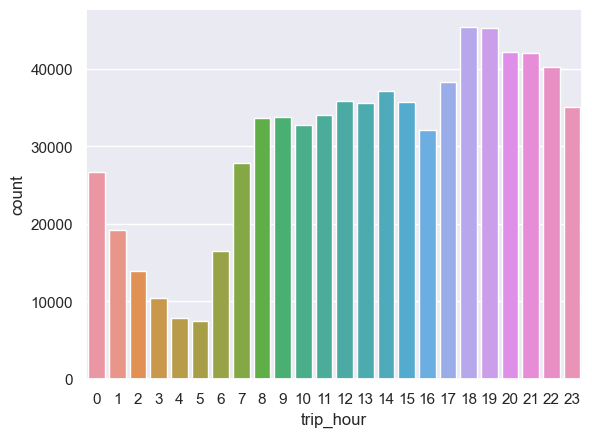

In [154]:
sns.countplot(x="trip_hour", data=df)

* Highest number of trips are recording during the evening hrs between 6 pm and 10 pm
* There are trips during every hour of the day
* Count of trips seems to be almost the same between 8 am and 4 pm


<Axes: xlabel='trip_day_name', ylabel='count'>

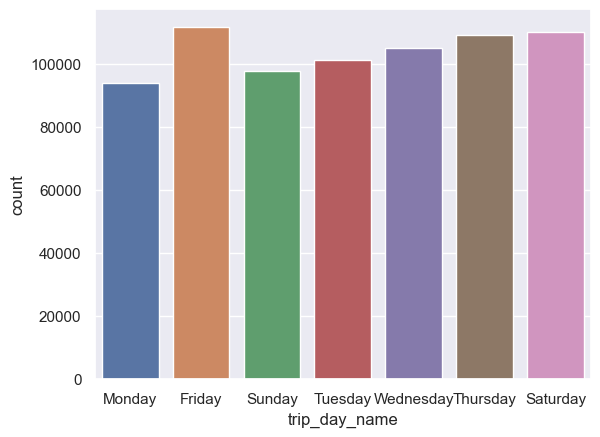

In [155]:
sns.countplot(x="trip_day_name", data=df)

* Highest number of trips is recorded on Friday
* Lowest number of trips are records on Monday
* Drivers are busy during the weekend as well. Volume of trips on Saturday is same as Thursday. 
* Number of trips on Sunday is higher than the same on Monday

<b> Bivariate Analysis

In [157]:
# isolating numerical datatypes
numerical = df.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

vendor_id              int64
passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
trip_day               int64
trip_month             int64
trip_hour              int64
distance             float64
dtype: object

In [158]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,trip_day,trip_month,trip_hour,distance
vendor_id,1.000000,0.286463,0.008198,0.002861,0.002371,0.005259,0.027752,0.000787,-0.005363,0.009772,0.006510
passenger_count,0.286463,1.000000,0.001163,-0.004696,-0.000027,-0.003944,0.013022,0.025758,-0.001481,0.009851,0.009175
pickup_longitude,0.008198,0.001163,1.000000,0.047635,0.780647,0.118473,0.035447,-0.016031,0.004037,0.010754,0.251482
pickup_latitude,0.002861,-0.004696,0.047635,1.000000,0.119970,0.479352,-0.038163,-0.029073,-0.000165,0.011433,-0.128455
dropoff_longitude,0.002371,-0.000027,0.780647,0.119970,1.000000,0.149598,0.020664,-0.001473,0.003883,-0.022014,0.132353
dropoff_latitude,0.005259,-0.003944,0.118473,0.479352,0.149598,1.000000,-0.028283,-0.022028,-0.000580,0.014257,-0.153760
trip_duration,0.027752,0.013022,0.035447,-0.038163,0.020664,-0.028283,1.000000,-0.002302,0.009378,0.002979,0.125772
trip_day,0.000787,0.025758,-0.016031,-0.029073,-0.001473,-0.022028,-0.002302,1.000000,-0.013626,-0.082079,0.007786
trip_month,-0.005363,-0.001481,0.004037,-0.000165,0.003883,-0.000580,0.009378,-0.013626,1.000000,-0.003301,0.016581
trip_hour,0.009772,0.009851,0.010754,0.011433,-0.022014,0.014257,0.002979,-0.082079,-0.003301,1.000000,-0.016269


In [167]:
c = numerical.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so = pd.DataFrame(so, columns=['Pearson Correlation'])

In [162]:
so[so['Pearson Correlation'] < 1].head(20)

,,Pearson Correlation
pickup_longitude,dropoff_longitude,0.780647
dropoff_longitude,pickup_longitude,0.780647
dropoff_latitude,pickup_latitude,0.479352
pickup_latitude,dropoff_latitude,0.479352
passenger_count,vendor_id,0.286463
vendor_id,passenger_count,0.286463
distance,pickup_longitude,0.251482
pickup_longitude,distance,0.251482
distance,dropoff_latitude,0.153760
dropoff_latitude,distance,0.153760


* Variables - droff and pickup coordinates are highly correlated. So one of those can be dropped while building the model

<b> Multivariate Analysis

In [165]:
df.pivot_table('trip_duration', ['trip_day_name', 'store_and_fwd_flag'], 'vendor_id', aggfunc='mean')

vendor_id                                   1            2
trip_day_name store_and_fwd_flag                          
Friday        N                    860.090584  1100.384200
              Y                   1132.332344          NaN
Monday        N                    798.944705   970.962559
              Y                   1149.941620          NaN
Saturday      N                    774.552947  1033.077079
              Y                    904.347197          NaN
Sunday        N                    753.916357  1013.377520
              Y                    955.223577          NaN
Thursday      N                    883.540366  1109.087182
              Y                   1166.995461          NaN
Tuesday       N                    886.143981  1059.411619
              Y                   1123.170055          NaN
Wednesday     N                    871.671036  1063.997373
              Y                   1191.023810          NaN

* Trip duration is not recorded by Vendor ID -2 when trip record is held in vehicle memory
* Mean of the trip duration is high during the weekdays compared to weekends.